In [ ]:
"""
Notebook: EDA_Consumo_Nacional.ipynb
Date: Oct 2025

Description:
    Exploratory Data Analysis (EDA) of national daily electricity consumption.
    
    Main Objectives:
    1. Descriptive Statistics: Analysis of the distribution of the target variable (consumption_gwh).
    2. Seasonality: Comparison of consumption by month and type of day (is_weekend), including significance tests (e.g., t-test, Mann-Whitney U).
    3. Correlations: Determination of the linear relationship between consumption and main meteorological drivers (HDD, CDD, temperature, radiation).

Database:
final_nacional_diario.csv

Requirements:
pip install pandas numpy matplotlib seaborn scipy
"""

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os

In [2]:
FPATH = r"C:\Users\pcata\OneDrive\Ambiente de Trabalho\final_nacional_diario.csv"

df = pd.read_csv(FPATH, low_memory=False)
print("shape:", df.shape)
print("columns:", df.columns.tolist())
df.head(3)

shape: (3931, 1)
columns: ['date;tmean_c_mean;tmean_c_min;tmean_c_max;tmean_c_std;tmax_c_mean;tmin_c_mean;hdd18_mean;cdd22_mean;amp_termica_mean;precip_mm_mean;rad_solar_mean;sunshine_h_mean;humidade_relativa_mean;nebulosidade_media_mean;wind_speed_max_mean;wind_gusts_max_mean;day_length_h_mean;n_zones;consumo_gwh;dow;is_weekend;month;year']


,date;tmean_c_mean;tmean_c_min;tmean_c_max;tmean_c_std;tmax_c_mean;tmin_c_mean;hdd18_mean;cdd22_mean;amp_termica_mean;precip_mm_mean;rad_solar_mean;sunshine_h_mean;humidade_relativa_mean;nebulosidade_media_mean;wind_speed_max_mean;wind_gusts_max_mean;day_length_h_mean;n_zones;consumo_gwh;dow;is_weekend;month;year
0,01/01/2015;7.398148148148148;3.1;11.6;2.149373...
1,02/01/2015;7.462962962962963;3.2;11.7;1.939198...
2,03/01/2015;7.814814814814815;3.7;12.7;1.812889...


In [4]:
FPATH = r"C:\Users\pcata\OneDrive\Ambiente de Trabalho\final_nacional_diario.csv"


df = pd.read_csv(FPATH, sep=';', low_memory=False)


print("shape:", df.shape)
print("columns (raw):", df.columns.tolist())
display(df.head())

shape: (3931, 24)
columns (raw): ['date', 'tmean_c_mean', 'tmean_c_min', 'tmean_c_max', 'tmean_c_std', 'tmax_c_mean', 'tmin_c_mean', 'hdd18_mean', 'cdd22_mean', 'amp_termica_mean', 'precip_mm_mean', 'rad_solar_mean', 'sunshine_h_mean', 'humidade_relativa_mean', 'nebulosidade_media_mean', 'wind_speed_max_mean', 'wind_gusts_max_mean', 'day_length_h_mean', 'n_zones', 'consumo_gwh', 'dow', 'is_weekend', 'month', 'year']


,date,tmean_c_mean,tmean_c_min,tmean_c_max,tmean_c_std,tmax_c_mean,tmin_c_mean,hdd18_mean,cdd22_mean,amp_termica_mean,...,nebulosidade_media_mean,wind_speed_max_mean,wind_gusts_max_mean,day_length_h_mean,n_zones,consumo_gwh,dow,is_weekend,month,year
0,01/01/2015,7.398148,3.1,11.6,2.149374,14.329630,2.879630,10.601852,0.0,11.450000,...,17.055556,11.066667,20.396296,9.383333,54,119.0,3,0,1,2015
1,02/01/2015,7.462963,3.2,11.7,1.939198,13.942593,3.112963,10.537037,0.0,10.829630,...,55.370370,9.592593,18.138889,9.396111,54,137.0,4,0,1,2015
2,03/01/2015,7.814815,3.7,12.7,1.812890,14.131481,3.444444,10.185185,0.0,10.687037,...,17.833333,9.650000,17.629630,9.409259,54,133.0,5,1,1,2015
3,04/01/2015,8.022222,3.7,13.0,2.012008,14.609259,3.400000,9.977778,0.0,11.209259,...,13.962963,9.433333,16.820370,9.422222,54,130.0,6,1,1,2015
4,05/01/2015,7.557407,3.6,12.9,1.716139,12.242593,3.546296,10.442593,0.0,8.696296,...,32.259259,8.659259,16.968519,9.436481,54,156.0,0,0,1,2015


In [5]:

def clean_cols(cols):
    out = []
    for c in cols:
        c2 = c.strip().lower()
        c2 = c2.replace(' ', '_').replace('-', '_').replace('.', '_')
        c2 = c2.replace('ç','c').replace('ã','a').replace('á','a').replace('é','e').replace('ó','o').replace('í','i')
        c2 = c2.replace('ú','u').replace('õ','o')
        out.append(c2)
    return out

df.columns = clean_cols(df.columns)
print("columns (clean):", df.columns.tolist())

columns (clean): ['date', 'tmean_c_mean', 'tmean_c_min', 'tmean_c_max', 'tmean_c_std', 'tmax_c_mean', 'tmin_c_mean', 'hdd18_mean', 'cdd22_mean', 'amp_termica_mean', 'precip_mm_mean', 'rad_solar_mean', 'sunshine_h_mean', 'humidade_relativa_mean', 'nebulosidade_media_mean', 'wind_speed_max_mean', 'wind_gusts_max_mean', 'day_length_h_mean', 'n_zones', 'consumo_gwh', 'dow', 'is_weekend', 'month', 'year']


In [6]:

if 'date' not in df.columns:
    # tenta achar uma coluna parecida:
    candidates = [c for c in df.columns if 'date' in c or 'data' in c or 'dia' in c]
    print("candidates for date column:", candidates)

else:
    df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')


print("date min/max:", df['date'].min(), df['date'].max())

date min/max: 2015-01-01 00:00:00 2025-10-05 00:00:00


usando colunas: ['hdd18_mean', 'cdd22_mean', 'tmean_c_mean', 'sunshine_h_mean', 'precip_mm_mean', 'consumo_gwh']
Pearson:
                  hdd18_mean  cdd22_mean  tmean_c_mean  sunshine_h_mean  \
hdd18_mean            1.000      -0.342        -0.941           -0.493   
cdd22_mean           -0.342       1.000         0.609            0.341   
tmean_c_mean         -0.941       0.609         1.000            0.551   
sunshine_h_mean      -0.493       0.341         0.551            1.000   
precip_mm_mean        0.123      -0.161        -0.184           -0.585   
consumo_gwh           0.444       0.013        -0.344           -0.353   

                 precip_mm_mean  consumo_gwh  
hdd18_mean                0.123        0.444  
cdd22_mean               -0.161        0.013  
tmean_c_mean             -0.184       -0.344  
sunshine_h_mean          -0.585       -0.353  
precip_mm_mean            1.000        0.143  
consumo_gwh               0.143        1.000  

Spearman:
                  

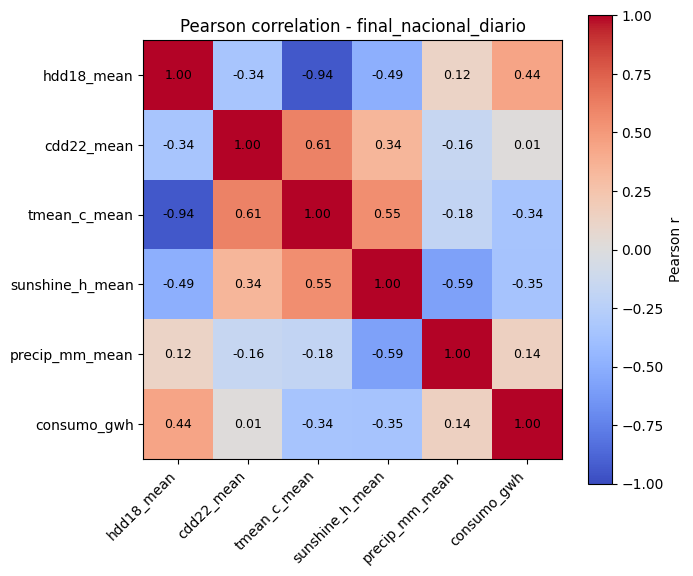

In [7]:
import matplotlib.pyplot as plt
from scipy import stats


cols_map = {
    "hdd": "hdd18_mean",
    "cdd": "cdd22_mean",
    "tmean": "tmean_c_mean",
    "sunshine": "sunshine_h_mean",
    "precip": "precip_mm_mean",
    "consumo": "consumo_gwh"
}
cols = [v for v in cols_map.values() if v in df.columns]
print("usando colunas:", cols)


corr_pear = df[cols].corr(method='pearson')
corr_spear = df[cols].corr(method='spearman')

print("Pearson:\n", corr_pear.round(3))
print("\nSpearman:\n", corr_spear.round(3))


plt.figure(figsize=(7,6))
plt.imshow(corr_pear, vmin=-1, vmax=1, cmap='coolwarm')
plt.colorbar(label='Pearson r')
plt.xticks(range(len(cols)), cols, rotation=45, ha='right')
plt.yticks(range(len(cols)), cols)
for i in range(len(cols)):
    for j in range(len(cols)):
        plt.text(j, i, f"{corr_pear.iloc[i,j]:.2f}", ha='center', va='center', fontsize=9)
plt.title("Pearson correlation - final_nacional_diario")
plt.tight_layout()
plt.show()

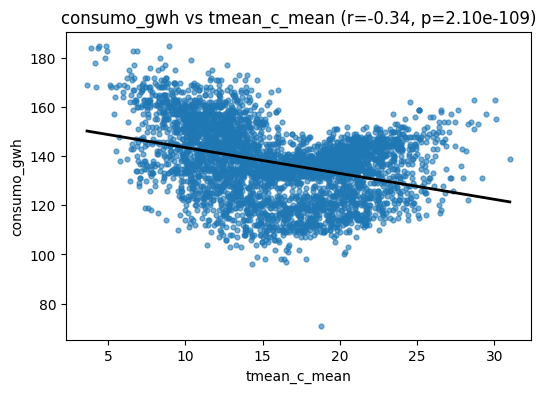

In [8]:
x = cols_map['tmean']
y = cols_map['consumo']
if x in df.columns and y in df.columns:
    sub = df[[x,y]].dropna()
    slope, intercept, r_value, p_value, std_err = stats.linregress(sub[x], sub[y])
    plt.figure(figsize=(6,4))
    plt.scatter(sub[x], sub[y], s=12, alpha=0.6)
    xs = np.linspace(sub[x].min(), sub[x].max(), 100)
    plt.plot(xs, intercept + slope*xs, color='k', lw=2)
    plt.xlabel(x); plt.ylabel(y)
    plt.title(f"{y} vs {x} (r={r_value:.2f}, p={p_value:.2e})")
    plt.show()
else:
    print("coluna tmean ou consumo não encontrada - ajusta nomes")

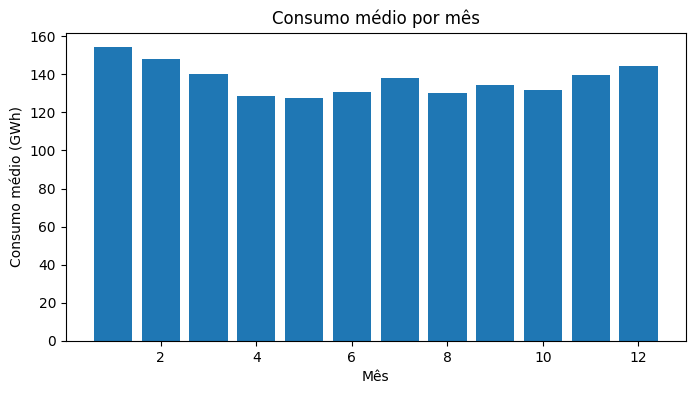

C:\Users\pcata\AppData\Local\Temp\ipykernel_53280\719365217.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_week, labels=['Dias úteis','Fim de semana'], showfliers=False)


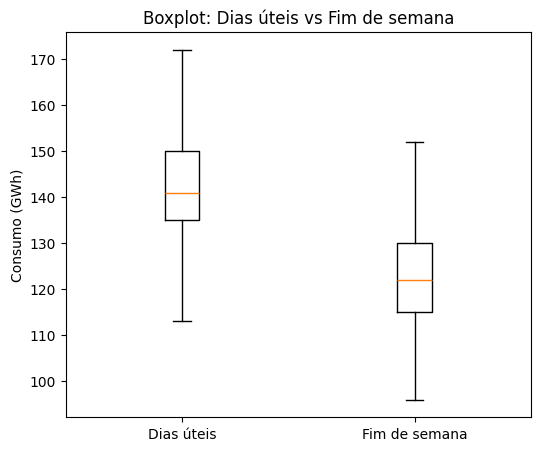

In [9]:

if 'month' not in df.columns:
    df['month'] = df['date'].dt.month
if 'is_weekend' not in df.columns:
    df['is_weekend'] = df['date'].dt.dayofweek.isin([5,6]).astype(int)


monthly = df.groupby('month')[cols_map['consumo']].mean()
plt.figure(figsize=(8,4))
plt.bar(monthly.index, monthly.values)
plt.xlabel('Mês'); plt.ylabel('Consumo médio (GWh)')
plt.title('Consumo médio por mês')
plt.show()


data_week = [df[df['is_weekend']==0][cols_map['consumo']].dropna(), df[df['is_weekend']==1][cols_map['consumo']].dropna()]
plt.figure(figsize=(6,5))
plt.boxplot(data_week, labels=['Dias úteis','Fim de semana'], showfliers=False)
plt.ylabel('Consumo (GWh)')
plt.title('Boxplot: Dias úteis vs Fim de semana')
plt.show()

In [10]:
from scipy.stats import ttest_ind, mannwhitneyu
a = df[df['is_weekend']==0][cols_map['consumo']].dropna()
b = df[df['is_weekend']==1][cols_map['consumo']].dropna()
print("t-test:", ttest_ind(a,b, equal_var=False))
print("Mann-Whitney:", mannwhitneyu(a,b, alternative='two-sided'))

t-test: TtestResult(statistic=np.float64(51.426394256790196), pvalue=np.float64(0.0), df=np.float64(2328.2735574456246))
Mann-Whitney: MannwhitneyuResult(statistic=np.float64(2815990.0), pvalue=np.float64(0.0))
